### Data Mining for Employee Attrition Analysis

Data mining plays a primary role in data analytics and the development of predictive modeling. Through the data mining process using IBM employee attrition data, we learn that Job Role, Over Time, Age, Stock Option Level, Job Involvement, Total Working Years, and Frequent Travel have a strong association with employee attrition.

In [138]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

warnings.filterwarnings('ignore')

In [139]:
pd.set_option('display.max_columns',None)
data = pd.read_csv('C:/D/Data Science/Kaggle_Binary Classification with a Tabular Employee Attrition Dataset/train.csv')
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [140]:
# Drop useless features
data = data.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18',
                        ])

In [277]:
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

# count: 
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['lightpink', 'lightskyblue'],
        line=dict(color='#000000',width=1.2)))

layout = dict(title =  'Count of total employee attrition', width=600,  height=400 )
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)


In [278]:
# Percentage:
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = data['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','lightpink'], 
                           line=dict(color='#000000', width=1.2)))

layout = dict(title =  'Distribution of employee attrition', width=600,  height=400)
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [279]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and attrition
    corr = data['Attrition'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['lightpink', '#43b0f1']
    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)

    fig['layout'].update(title = var_select+' '+'(correlation with attrition ='+ str(corr)+')')
    # Adjust figure size
    fig.update_layout(width=600, height=400)  
    
    py.iplot(fig, filename = 'Density plot')

In [280]:
plot_distribution('Age', False)

In [281]:
plot_distribution('DailyRate', 100)

In [282]:
plot_distribution('HourlyRate', False)

In [283]:
plot_distribution('MonthlyIncome', 100)

In [284]:
plot_distribution('PercentSalaryHike', False)

In [285]:
plot_distribution('TotalWorkingYears', False)

In [286]:
plot_distribution('NumCompaniesWorked', False)

In [287]:
plot_distribution('TrainingTimesLastYear', False)

In [288]:
plot_distribution('YearsAtCompany', False)

In [289]:
plot_distribution('YearsInCurrentRole', False)

In [290]:
plot_distribution('YearsSinceLastPromotion', False)

In [291]:
plot_distribution('YearsWithCurrManager', False)

In [292]:
plot_distribution('DistanceFromHome', False)

In [293]:
def plot_pie(var_select) :
    
    colors = ['lightskyblue','lightpink', 'gold', 'lightgreen', 'lightcoral',  'lightgrey', 'orange', 'white' ]
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employees attrition ",
                            width=600,  
                            height=400,
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 11),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 11),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [294]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Attrition'] != 0)]
    tmp2 = data[(data['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','lightpink' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='lightpink',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str('Employee attrition by ' + var_select),
              width=600,  
              height=400,
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [263]:
plot_pie("Gender")

In [264]:
plot_pie('MaritalStatus') 

In [265]:
plot_pie('OverTime')

In [266]:
plot_pie('BusinessTravel')

In [267]:
plot_pie('JobRole')

In [268]:
barplot('Department',True)

In [269]:
plot_pie('EducationField') 

In [270]:
barplot('EducationField',True)

In [271]:
barplot('Education',False)

In [272]:
barplot('EnvironmentSatisfaction',False)

In [273]:
barplot('JobInvolvement', False)

In [274]:
barplot('JobLevel',False)

In [275]:
barplot('JobSatisfaction',False)

In [276]:
barplot('PerformanceRating',False)

In [240]:
barplot('RelationshipSatisfaction', False)

In [241]:
barplot('StockOptionLevel', False)

In [242]:
barplot('WorkLifeBalance', False)

In [243]:
data_proc.head()  

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobRole_Sales Representative,Travel_Frequently,Department_RD,Department_Sales
0,0.0,36.0,599.0,24.0,3.0,4.0,1.0,42.0,3.0,1.0,4.0,2596.0,5099.0,1.0,1.0,13.0,3.0,2.0,1.0,10.0,2.0,3.0,10.0,0.0,7.0,8.0,0.0,0.0,1.0,1.0,0.0
1,1.0,35.0,921.0,8.0,3.0,1.0,1.0,46.0,3.0,1.0,1.0,2899.0,10778.0,1.0,0.0,17.0,3.0,4.0,1.0,4.0,3.0,3.0,4.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
2,2.0,32.0,718.0,26.0,3.0,3.0,1.0,80.0,3.0,2.0,4.0,4627.0,16495.0,0.0,0.0,17.0,3.0,4.0,2.0,4.0,3.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0
3,3.0,38.0,1488.0,2.0,3.0,3.0,0.0,40.0,3.0,2.0,1.0,5347.0,13384.0,3.0,0.0,14.0,3.0,3.0,0.0,15.0,1.0,1.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,4.0,50.0,1017.0,5.0,4.0,2.0,0.0,37.0,3.0,5.0,1.0,19033.0,19805.0,1.0,1.0,13.0,3.0,3.0,0.0,31.0,0.0,3.0,31.0,14.0,4.0,10.0,1.0,0.0,0.0,1.0,0.0


In [116]:
data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [117]:
data_proc = data
data_proc['JobRole_Sales Representative'] = (data['JobRole']== 'Sales Representative').astype(int)
data_proc['Travel_Frequently'] = (data['BusinessTravel']=='Travel_Frequently').astype(int)
data_proc['Gender'] = (data['Gender']=='Male').astype(int)
data_proc['Department_RD'] = (data['Department']== 'Research & Development').astype(int)
data_proc['Department_Sales'] = (data['Department']== 'Sales').astype(int)
data_proc['OverTime'] = (data['OverTime'] == 'Yes').astype(int)
data_proc = data_proc.select_dtypes(exclude=['object'])
data_proc.head()  

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobRole_Sales Representative,Travel_Frequently,Department_RD,Department_Sales
0,0,36,599,24,3,4,1,42,3,1,4,2596,5099,1,1,13,3,2,1,10,2,3,10,0,7,8,0,0,1,1,0
1,1,35,921,8,3,1,1,46,3,1,1,2899,10778,1,0,17,3,4,1,4,3,3,4,2,0,3,0,1,0,0,1
2,2,32,718,26,3,3,1,80,3,2,4,4627,16495,0,0,17,3,4,2,4,3,3,3,2,1,2,0,0,0,0,1
3,3,38,1488,2,3,3,0,40,3,2,1,5347,13384,3,0,14,3,3,0,15,1,1,6,0,0,2,0,0,0,1,0
4,4,50,1017,5,4,2,0,37,3,5,1,19033,19805,1,1,13,3,3,0,31,0,3,31,14,4,10,1,0,0,1,0


In [118]:
data_proc.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobRole_Sales Representative,Travel_Frequently,Department_RD,Department_Sales
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,2.757901,0.634466,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,0.238521,14.903399,3.127609,2.751342,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261,0.045915,0.155635,0.695886,0.280859
std,484.252517,8.507112,374.496259,7.826143,1.039078,1.086835,0.481723,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,0.426306,3.420801,0.333753,1.077905,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192,0.209364,0.362617,0.460169,0.449553
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,2.000000,0.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,3.000000,1.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,0.000000,14.000000,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,4.000000,1.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,0.000000,17.000000,3.000000,4.000000,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,4.000000,1.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
data_proc = (data_proc).astype(float)

Text(0.5, 1.0, 'Feature Importance for Predicting Employee Attrition')

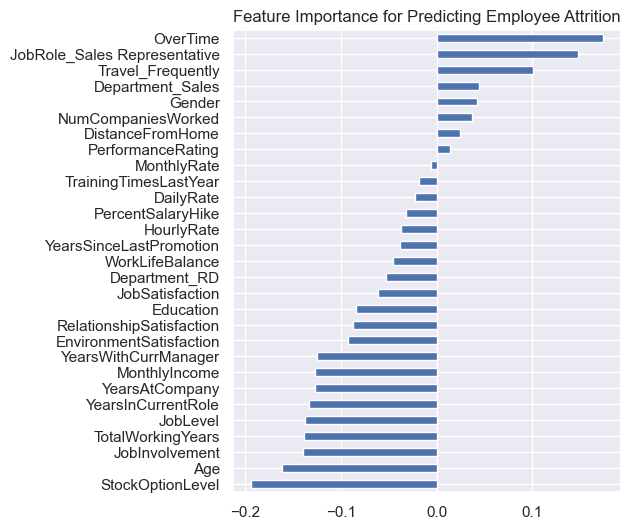

In [244]:
data_proc.drop(['Attrition', 'id'], axis=1).corrwith(data_proc.Attrition).sort_values().plot(kind='barh', figsize=(5, 6)).set_title('Feature Importance for Predicting Employee Attrition')